<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [76]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [94]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('job_listings.csv', header=0)
df = df.drop(axis= 1, columns= 'Unnamed: 0')

df.head()
df.shape

(426, 2)

In [95]:
for row in df['description']:
  soup = BeautifulSoup(markup=row)
  print(soup.get_text())

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"
b'Job Description\n\nAs a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their 

## 2) Use Spacy to tokenize the listings 

In [96]:
import en_core_web_sm
nlp = en_core_web_sm.load()

def my_tokenizer(text):
  doc = nlp(text)
  tokens = []

  for token in doc:
    if (token.is_stop == False) and (token.is_punct == False):
      tokens.append(token.lemma_.lower())

  return tokens

In [97]:
text = my_tokenizer(soup.get_text())

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [98]:
vect = CountVectorizer(stop_words='english')

vect.fit(text)

dtm = vect.transform(text)

In [99]:
dtm = pd.DataFrame(data= dtm.toarray(), columns= vect.get_feature_names())

In [100]:
dtm.shape

(386, 300)

## 4) Visualize the most common word counts

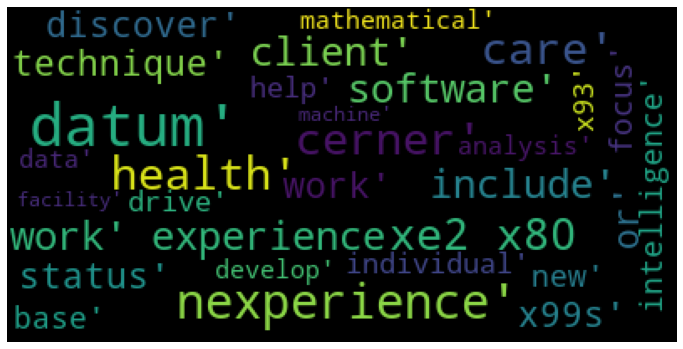

In [106]:
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

stopwords = set(STOPWORDS)

wordcloud_doc = WordCloud(stopwords=stopwords, background_color= 'black', max_font_size= 35, max_words= 30).generate(str(text))

plt.figure(figsize= (12,12))
plt.imshow(wordcloud_doc)
plt.axis('off');

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [107]:
def idf(n, df):
  return np.log(n/df)

n = len(df)
df_range = 100
IDF = []

for df in range(1, df_range + 1):
  idf_score = idf(n, df)
  IDF.append(idf_score)

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("IDF Score vs Document Frequency of Token")
plt.xlabel("Document Frequency of Token")
plt.ylabel("IDF Score")
plt.grid()
plt.plot(IDF);

# Second graph not showing any line for some reason
# plt.figure(figsize=(15, 10))
# plt.title("IDF Score vs Document Frequency of Token")
# plt.xlabel("Document Frequency of Token")
# plt.ylabel("IDF Score")
# plt.xlim(95, 100)
# plt.ylim(0, 0.10)
# plt.grid()
# plt.plot(IDF);
# plt.show()

In [123]:
tfid_vec = TfidfVectorizer(input= text, ngram_range= (1,2), stop_words= 'english', max_features= 1500)

tfid_vec.fit(text)

dtm = tfid_vec.transform(text)
dtm = pd.DataFrame(data= dtm.toarray(), columns= tfid_vec.get_feature_names())

In [125]:
dtm.shape

(386, 332)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [126]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors= 100, algorithm= 'kd_tree')
nn.fit(dtm)

doc_index = 0
doc = [dtm.iloc[doc_index].values]

neighbor_distance, neighbor_index = nn.kneighbors(doc)

In [127]:
print('Neighbor Distance is: ', neighbor_distance)
print('Neighbor Index is: ', neighbor_index)

Neighbor Distance is:  [[0.         0.         0.         0.         0.         0.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.4142

In [137]:
dtm.head()

,000,25,25 000,35,accordance,achieve,action,additional,advanced,age,agile,aim,algorithm,allow,ambitious,analysis,analytic,analytical,analytics,ancestry,annual,applied,apply,appropriate,area,area nwille,asset,assistance,association,authorize,available,avro,avro nexperience,background,base,biostatistics,bright,business,care,career,...,states,statistical,statistics,status,storage,study,support,talent,tb,team,technique,technology,thrive,time,tool,transform,tree,understand,united,unstructured,update,valid,value,verification,veteran,visa,visually,warehousing,willing,work,workflow,workplace,x80,x80 x93,x80 x99s,x93,x99s,xe2,xe2 x80,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 